In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("Automobile_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

## Data Cleaning

In [4]:
df.replace('?', None)
df = df.drop(columns=['normalized-losses'])

df["horsepower"] = df["horsepower"].apply(lambda x: None if x == '?' else float(x))

df["peak-rpm"] = df["peak-rpm"].apply(lambda x: None if x == '?' else float(x))

df["city-mpg"] = df["city-mpg"].apply(lambda x: None if x == '?' else float(x))
df["highway-mpg"] = df["highway-mpg"].apply(lambda x: None if x == '?' else float(x))
df["price"] = df["price"].apply(lambda x: None if x == '?' else float(x))

df["log_price"] = np.log(df["price"])
df = df.dropna()

In [5]:
df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,log_price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,9.510075
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,9.711116
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,9.711116
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.4,10.0,102.0,5500.0,24.0,30.0,13950.0,9.543235
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.4,8.0,115.0,5500.0,18.0,22.0,17450.0,9.767095


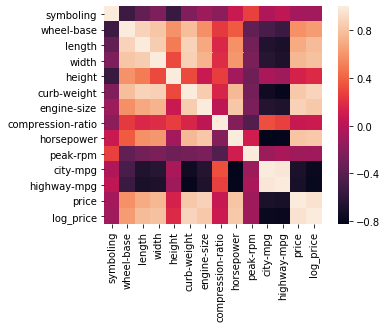

In [6]:
corrmat = df.corr()
sns.heatmap(corrmat, square=True)

## Feature engineering and selection

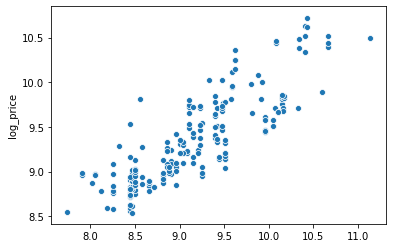

In [7]:
sns.scatterplot(y=df["log_price"], x=np.log(np.array(df["horsepower"])**2))

In [10]:
df["hp_log_sq"] = np.log(np.array(df["horsepower"])) ** 2

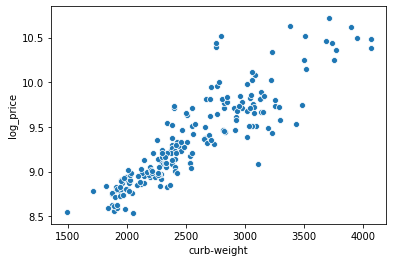

In [8]:
sns.scatterplot(y=df["log_price"], x=df["curb-weight"])

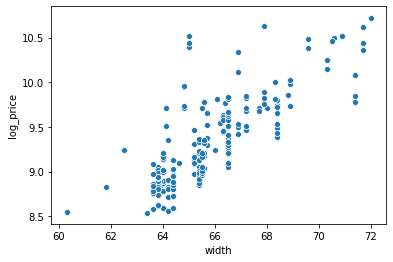

In [9]:
sns.scatterplot(y=df["log_price"], x=df["width"])

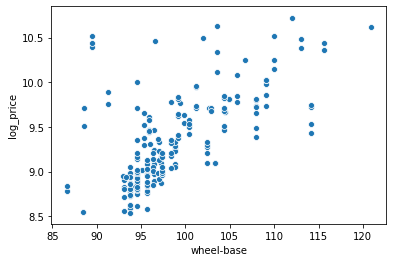

In [11]:
sns.scatterplot(x=df["wheel-base"], y=df["log_price"])

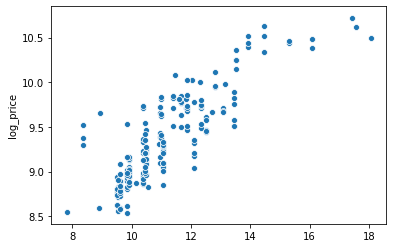

In [12]:
sns.scatterplot(x=np.array(df["engine-size"])**0.5, y=df["log_price"])

In [13]:
df["engine-size_sqroot"] = np.array(df["engine-size"]) ** 0.5

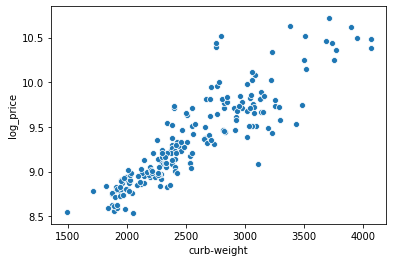

In [14]:
sns.scatterplot(x=df["curb-weight"], y=df["log_price"])

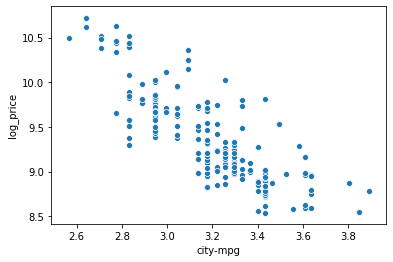

In [16]:
sns.scatterplot(x=(np.log(df["city-mpg"])), y=df["log_price"])

In [17]:
df["city-mpg_log"] = np.log(df["city-mpg"])

In [18]:
new_df = df.filter(['log_price', 
                    'city-mpg_log', 
                    'curb-weight', 
                    "engine-size_sqroot", 
                    "wheel-base",
                   "width",
                   "hp_log_sq",
                   ])

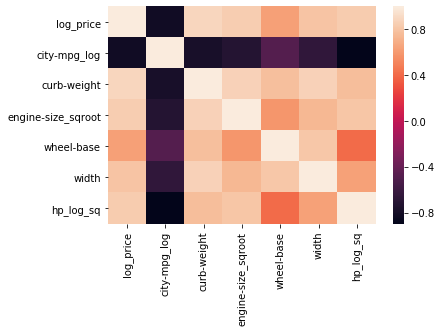

In [19]:
new_corr = new_df.corr()
sns.heatmap(new_corr)